<a href="https://colab.research.google.com/github/khrystikk/hackhaton_genesis/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всіх вітаю в даному зошиті!

Тут я покажу виконане завдання 2 повністю, бо незручно буде перемикатись в MySQL чи інші платформи, тому тут будуть і схема, і коди, і все що потрібно для виконання завдання. Тож, розпочнемо!!

# Завдання 2.1


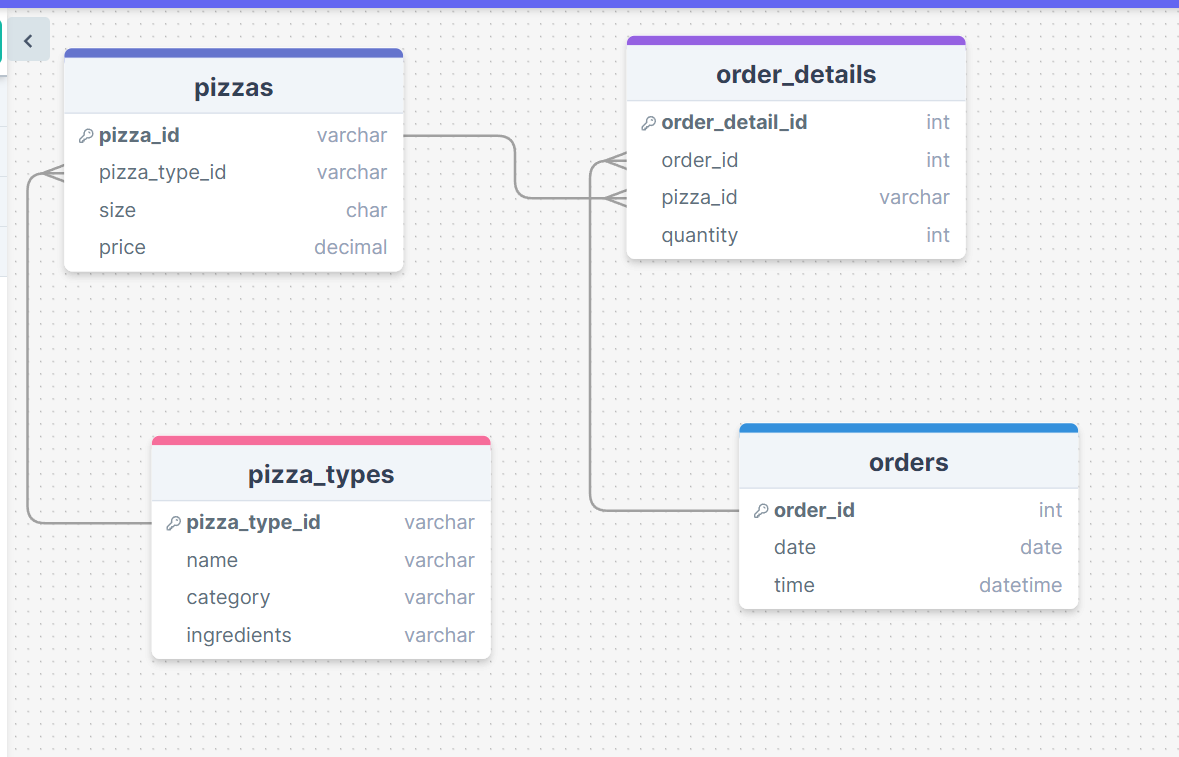

# 2.2.

Запустивши даний код, можна завантажити ваші файли у ваше середовище(надіюсь я правильно зрозумів суть завдання, і все ок :-) )

In [1]:
from google.colab import files
uploaded = files.upload()

Saving order_details.csv to order_details.csv
Saving orders.csv to orders.csv
Saving pizza_types.csv to pizza_types.csv
Saving pizzas.csv to pizzas.csv


# 2.3.
Pandas. Чи є у закладу пікові години?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
order_details = pd.read_csv('/content/order_details.csv')
orders = pd.read_csv('/content/orders.csv')
pizzas = pd.read_csv('/content/pizzas.csv')

In [4]:
pizza_types = pd.read_csv('/content/pizza_types.csv', encoding='windows-1252')

In [66]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


Перед виконанням цього завдання, варто зробити колонку time погодинно.

In [6]:
orders[['hours', 'minutes', 'seconds']] = orders.time.str.split(':', expand=True)

In [7]:
orders.head()

,order_id,date,time,hours,minutes,seconds
0,1,2015-01-01,11:38:36,11,38,36
1,2,2015-01-01,11:57:40,11,57,40
2,3,2015-01-01,12:12:28,12,12,28
3,4,2015-01-01,12:16:31,12,16,31
4,5,2015-01-01,12:21:30,12,21,30


<Axes: xlabel='hours', ylabel='Count'>

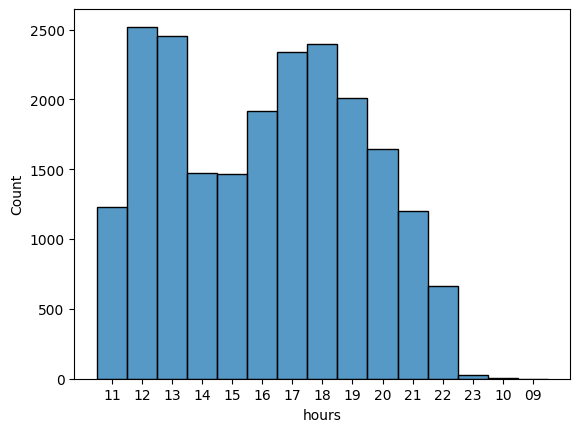

In [8]:
sns.histplot(data=orders, x='hours')

З графіку вище видно, що пікові години припадають на 12-13 дня, та 17-19 вечора. Перший часовий проміжок пов'язаний швидше за все з роботою та обідом, вечірній час у свою чергу, більше з тим, що вже після роботи хочеться такої їжі.

# 2.4

Чи існує певна сезонна кореляція продажів?

In [18]:
orders = orders.astype({"date": 'datetime64[ns]'})

In [21]:
orders.dtypes

order_id             int64
date        datetime64[ns]
time                object
hours               object
minutes             object
seconds             object
dtype: object

<Axes: xlabel='date', ylabel='Count'>

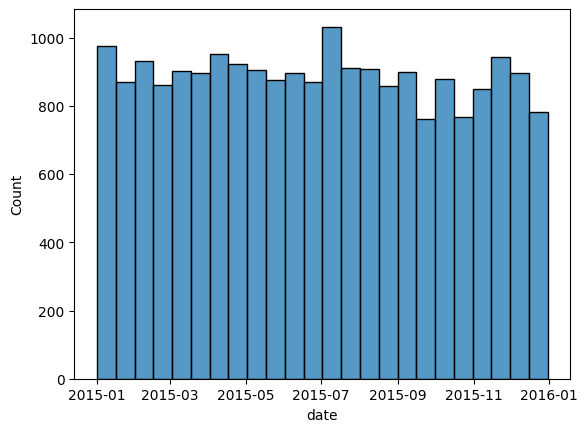

In [26]:
sns.histplot(data=orders, x='date', bins=24)

З даного графіку можемо побачити, що тенденція на зріст споживання піци йде весною та літом, коли вже зниження ближче до осені та зими.

 Також, споживання даного продукту цілком можливо залежить від свят, коли, наприклад, Новий рік, то люди й замовляють даний продукт.

# 2.5

Чи варто на вашу думку вилучити певні позиції з меню, і якщо так, то які
саме?

In [27]:
result = pizzas.merge(order_details, on='pizza_id')

In [28]:
result.head()

,pizza_id,pizza_type_id,size,price,order_details_id,order_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,11,6,1
1,bbq_ckn_s,bbq_ckn,S,12.75,239,102,1
2,bbq_ckn_s,bbq_ckn,S,12.75,294,124,1
3,bbq_ckn_s,bbq_ckn,S,12.75,458,194,1
4,bbq_ckn_s,bbq_ckn,S,12.75,489,208,1


In [42]:
result_groupby = result.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=True)
result_groupby.head(15)

pizza_type_id
brie_carre       490
mediterraneo     934
calabrese        937
spinach_supr     950
soppressata      961
spin_pesto       970
ckn_pesto        973
ital_veggie      981
ckn_alfredo      987
green_garden     997
pep_msh_pep     1359
five_cheese     1409
the_greek       1420
ital_cpcllo     1438
peppr_salami    1446
Name: quantity, dtype: int64

In [38]:
pizza_types[pizza_types['pizza_type_id'] == 'brie_carre']

,pizza_type_id,name,category,ingredients
14,brie_carre,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


Можемо помітити, що одна з піц, а саме **"The Brie Carre Pizza"** сильно відстає від інших, саме з точки зору кількості замовлень. Її варто було би прибрати з меню даної піцерії.

# SQL Завдання. 2.6.

Скільки клієнтів в середньому заклад має кожен день?

Встановимо допоміжну бібліотеку, для роботи з SQL в Python середовищі.

In [46]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=fd91f36e6321f39f20223f263894fef7940c224013a54dd374f09a6df4876ea0
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [51]:
from pandasql import sqldf

In [61]:
output1 = sqldf('SELECT AVG(cnt) as Average_customers FROM (SELECT COUNT(*) AS cnt FROM orders GROUP BY date)')
output1

,Average_customers
0,59.636872


Отже, в середньому в піцерію приходять близько 60 осіб на день.

# 2.7.

Яка була середня кількість піц в замовленні восени?


In [62]:
output2 = sqldf('SELECT AVG(quantity) FROM orders AS o LEFT JOIN order_details AS od ON o.order_id = od.order_id WHERE date BETWEEN "2015-09-01" AND "2015-11-30"')
output2

,AVG(quantity)
0,1.020225


Середня кількість піц в замовленні восени становить 1.02.

# 2.8

Скільки грошей заклад заробив в червні з трьох найпопулярніших піц?

In [75]:
output3 = sqldf('SELECT SUM(sum_q * price) AS final_sum FROM (SELECT SUM(quantity) AS sum_q, price FROM order_details AS o LEFT JOIN pizzas AS p ON o.pizza_id = p.pizza_id GROUP BY p.pizza_id ORDER BY sum_q DESC LIMIT 3)')
output3

,final_sum
0,78292.0


# 2.9

Порахуйте кількість замовлених піц кожного розміру для кожної категорії піц.

In [83]:
output4 = sqldf('SELECT category, size, SUM(quantity) AS summary FROM (SELECT * FROM (SELECT * FROM order_details AS o LEFT JOIN pizzas AS p ON o.pizza_id = p.pizza_id) AS op LEFT JOIN pizza_types AS pt ON op.pizza_type_id = pt.pizza_type_id) GROUP BY category, size ORDER BY category, size DESC')
output4

,category,size,summary
0,Chicken,S,2224
1,Chicken,M,3894
2,Chicken,L,4932
3,Classic,XXL,28
4,Classic,XL,552
5,Classic,S,6139
6,Classic,M,4112
7,Classic,L,4057
8,Supreme,S,3377
9,Supreme,M,4046


Коди вийшли доволі таки незручними для читання, приношу вибачення за це, але, надіюсь, результати гідні високих оцінок!

Дякую за увагу!!!